# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [55]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [56]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5
def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [88]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720925453725e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [107]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

[[0.         0.         0.00636806 0.00174578 0.00085369 0.
  0.00093444 0.         0.         0.        ]
 [0.00152087 0.02392246 0.         0.01552419 0.01448698 0.00510456
  0.         0.         0.         0.0197922 ]
 [0.00715899 0.02018664 0.01562183 0.         0.         0.
  0.00194898 0.01654195 0.02198662 0.        ]
 [0.0071779  0.0194401  0.01727127 0.         0.         0.
  0.00216511 0.01681476 0.02236263 0.        ]
 [0.00090181 0.01832627 0.         0.01301156 0.01210217 0.00411024
  0.         0.         0.         0.01597705]]
Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [132]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)


# these should all be less than 1e-8 or so
# print(grads)
for param_name in grads:

    print('param name',param_name)
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

param name W2
[[-5.13764691e-01  1.67232930e-01  3.04783350e-01]
 [ 1.95077539e-02 -5.09652183e-03 -4.38074301e-03]
 [ 2.92229174e-01  1.18896894e-01 -4.32018096e-01]
 [-2.33121075e-01  1.86288200e-01  3.96198312e-02]
 [ 7.78174796e-01 -3.54233027e-01 -4.41137965e-01]
 [ 4.28331870e-03  6.65172228e-04  3.02471899e-03]
 [-6.34322094e-03 -3.62741166e-03 -6.72460447e-03]
 [ 6.17281609e-02 -1.29900489e-01  3.91825079e-02]
 [ 6.32053946e-01 -8.44023524e-02 -5.66197124e-01]
 [ 8.89334995e-01 -6.04709348e-01 -2.88551353e-01]]
W2 max relative error: 3.440708e-09
param name b2
[ 0.2099691 -0.1431905 -0.0667786]
b2 max relative error: 4.447656e-11
param name W1
[[-9.68499042e-02  4.00157207e-03 -2.05517828e-01  1.87986352e-01
   1.60531645e-01 -9.77277881e-03  9.50088417e-03  2.68884343e-03
  -3.01022811e-02 -5.67802800e-03]
 [ 4.45595008e-02  1.45427351e-02  6.95515502e-01 -2.88616327e-01
  -2.66986989e-01  3.33674328e-03  1.49407907e-02  1.93435586e-02
  -6.54700997e-02 -5.32928651e-01]
 [ 1.1

# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149672727854906


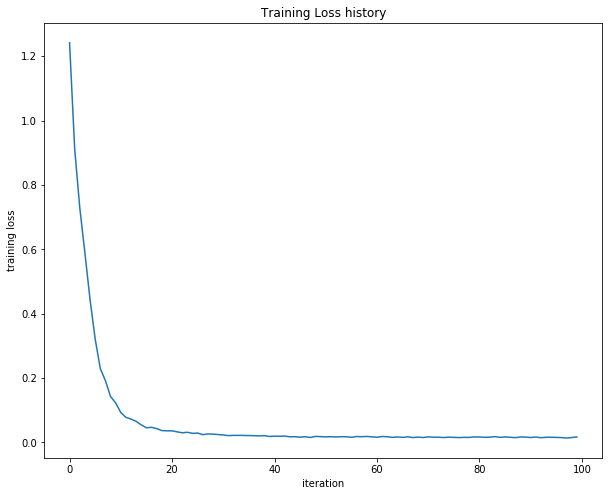

In [136]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [173]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [174]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302980
iteration 100 / 1000: loss 2.302619
iteration 200 / 1000: loss 2.299259
iteration 300 / 1000: loss 2.280043
iteration 400 / 1000: loss 2.200082
iteration 500 / 1000: loss 2.061580
iteration 600 / 1000: loss 2.101240
iteration 700 / 1000: loss 2.044376
iteration 800 / 1000: loss 1.978079
iteration 900 / 1000: loss 1.948056
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

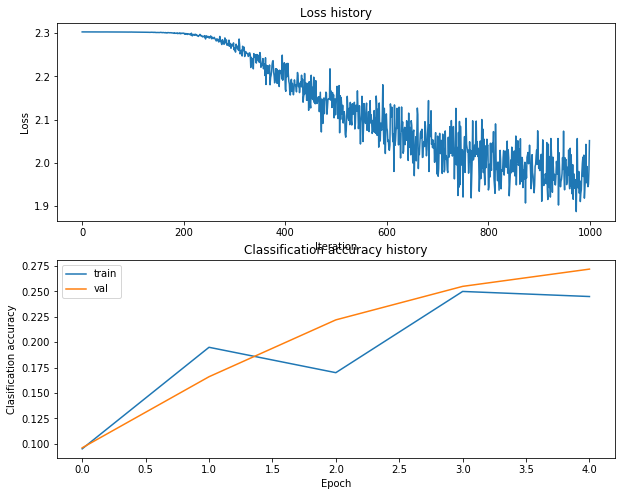

In [154]:
# Plot the loss function and train / validation accuracies
def show_graph(stats):
    plt.subplot(2, 1, 1)
    plt.plot(stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(stats['train_acc_history'], label='train')
    plt.plot(stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.show()
    
show_graph(stats)

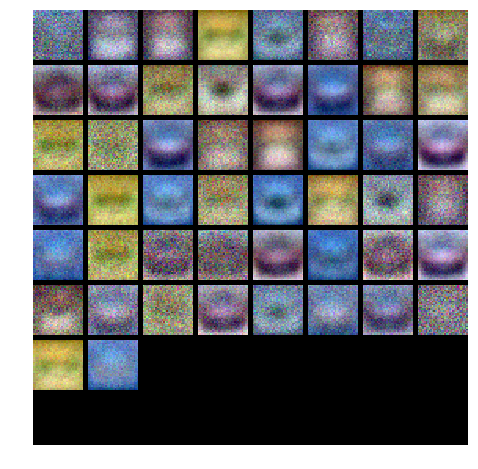

In [155]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

hyper parameter is  (0.0002, 0.1, 0.9)
iteration 0 / 1000: loss 2.302745
iteration 100 / 1000: loss 2.299889
iteration 200 / 1000: loss 2.222372
iteration 300 / 1000: loss 2.055451
iteration 400 / 1000: loss 1.968328
iteration 500 / 1000: loss 2.013688
iteration 600 / 1000: loss 1.933729
iteration 700 / 1000: loss 1.901966
iteration 800 / 1000: loss 1.816441
iteration 900 / 1000: loss 1.807567
Validation accuracy:  0.364


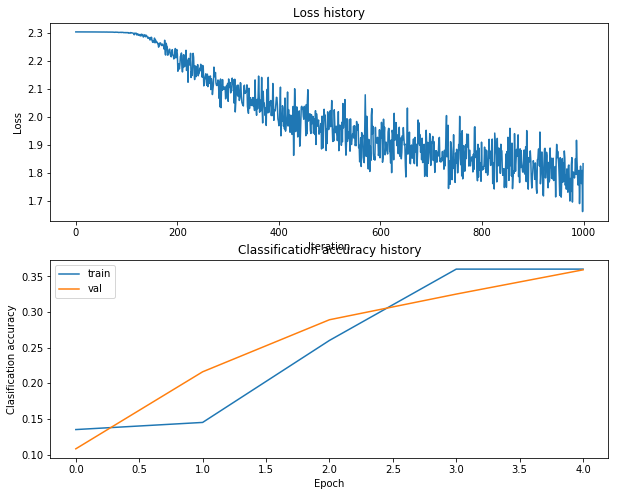

hyper parameter is  (0.0002, 0.1, 0.91)
iteration 0 / 1000: loss 2.302726
iteration 100 / 1000: loss 2.300558
iteration 200 / 1000: loss 2.201236
iteration 300 / 1000: loss 2.036044
iteration 400 / 1000: loss 2.051184
iteration 500 / 1000: loss 1.966962
iteration 600 / 1000: loss 1.920296
iteration 700 / 1000: loss 1.869420
iteration 800 / 1000: loss 1.875789
iteration 900 / 1000: loss 1.784994
Validation accuracy:  0.363


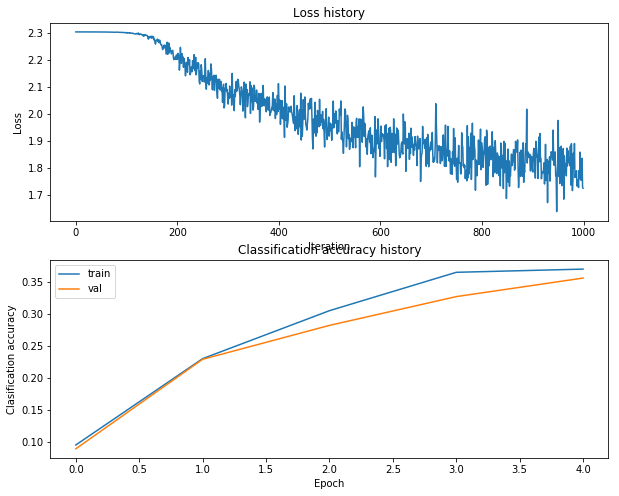

hyper parameter is  (0.0002, 0.1, 0.92)
iteration 0 / 1000: loss 2.302721
iteration 100 / 1000: loss 2.299208
iteration 200 / 1000: loss 2.225599
iteration 300 / 1000: loss 2.119022
iteration 400 / 1000: loss 1.951857
iteration 500 / 1000: loss 1.895824
iteration 600 / 1000: loss 1.857359
iteration 700 / 1000: loss 1.789878
iteration 800 / 1000: loss 1.712541
iteration 900 / 1000: loss 1.961293
Validation accuracy:  0.354


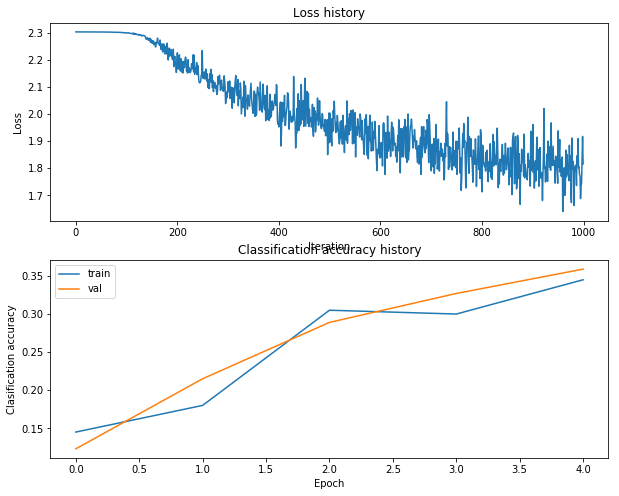

hyper parameter is  (0.0002, 0.1, 0.93)
iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss 2.299387
iteration 200 / 1000: loss 2.236453
iteration 300 / 1000: loss 2.052126
iteration 400 / 1000: loss 1.979343
iteration 500 / 1000: loss 1.895077
iteration 600 / 1000: loss 1.950173
iteration 700 / 1000: loss 1.873144
iteration 800 / 1000: loss 1.749164
iteration 900 / 1000: loss 1.790832
Validation accuracy:  0.371


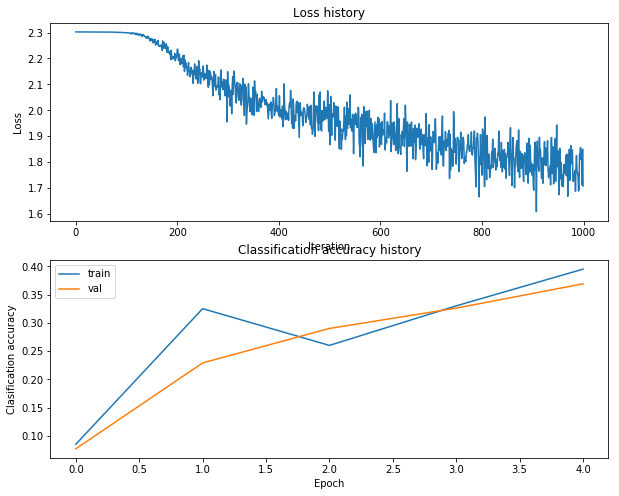

hyper parameter is  (0.0002, 0.11, 0.9)
iteration 0 / 1000: loss 2.302743
iteration 100 / 1000: loss 2.298167
iteration 200 / 1000: loss 2.214813
iteration 300 / 1000: loss 2.093748
iteration 400 / 1000: loss 1.982648
iteration 500 / 1000: loss 2.002083
iteration 600 / 1000: loss 1.921612
iteration 700 / 1000: loss 1.703194
iteration 800 / 1000: loss 1.878183
iteration 900 / 1000: loss 1.700602
Validation accuracy:  0.361


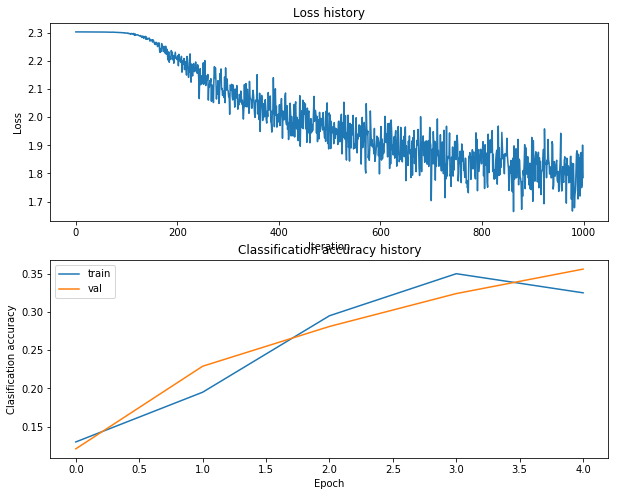

hyper parameter is  (0.0002, 0.11, 0.91)
iteration 0 / 1000: loss 2.302738
iteration 100 / 1000: loss 2.298085
iteration 200 / 1000: loss 2.191212
iteration 300 / 1000: loss 2.090664
iteration 400 / 1000: loss 1.961038
iteration 500 / 1000: loss 2.012377
iteration 600 / 1000: loss 1.848159
iteration 700 / 1000: loss 1.887525
iteration 800 / 1000: loss 1.897570
iteration 900 / 1000: loss 1.897389
Validation accuracy:  0.36


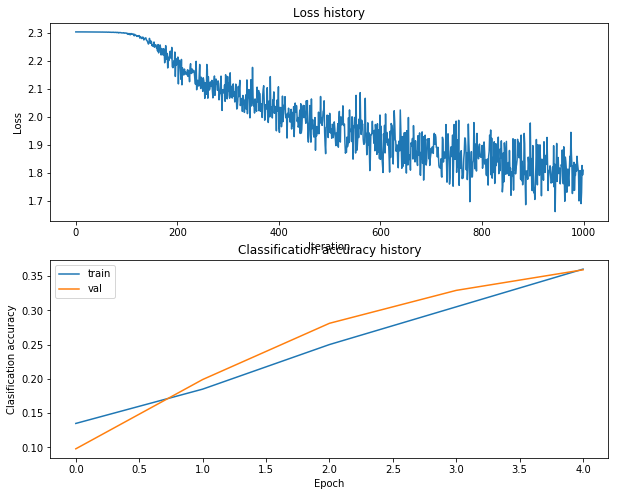

hyper parameter is  (0.0002, 0.11, 0.92)
iteration 0 / 1000: loss 2.302747
iteration 100 / 1000: loss 2.298084
iteration 200 / 1000: loss 2.203593
iteration 300 / 1000: loss 2.050226
iteration 400 / 1000: loss 1.965207
iteration 500 / 1000: loss 1.908396
iteration 600 / 1000: loss 1.847157
iteration 700 / 1000: loss 1.878776
iteration 800 / 1000: loss 1.871436
iteration 900 / 1000: loss 1.788887
Validation accuracy:  0.373


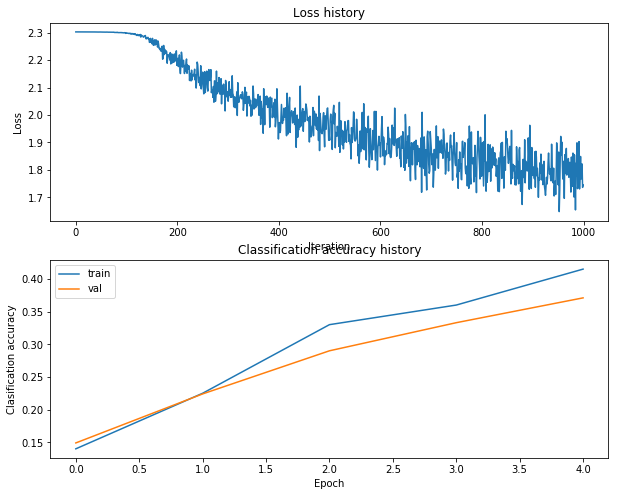

hyper parameter is  (0.0002, 0.11, 0.93)
iteration 0 / 1000: loss 2.302779
iteration 100 / 1000: loss 2.299368
iteration 200 / 1000: loss 2.222282
iteration 300 / 1000: loss 2.072134
iteration 400 / 1000: loss 2.027549
iteration 500 / 1000: loss 1.914168
iteration 600 / 1000: loss 1.956173
iteration 700 / 1000: loss 1.886379
iteration 800 / 1000: loss 1.753969
iteration 900 / 1000: loss 1.754948
Validation accuracy:  0.36


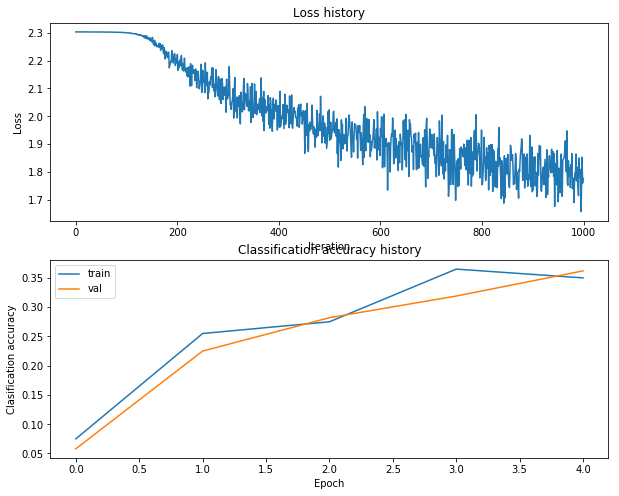

hyper parameter is  (0.0002, 0.12, 0.9)
iteration 0 / 1000: loss 2.302771
iteration 100 / 1000: loss 2.300393
iteration 200 / 1000: loss 2.241548
iteration 300 / 1000: loss 2.160866
iteration 400 / 1000: loss 2.120255
iteration 500 / 1000: loss 1.996880
iteration 600 / 1000: loss 1.874224
iteration 700 / 1000: loss 1.845317
iteration 800 / 1000: loss 2.000413
iteration 900 / 1000: loss 1.715797
Validation accuracy:  0.357


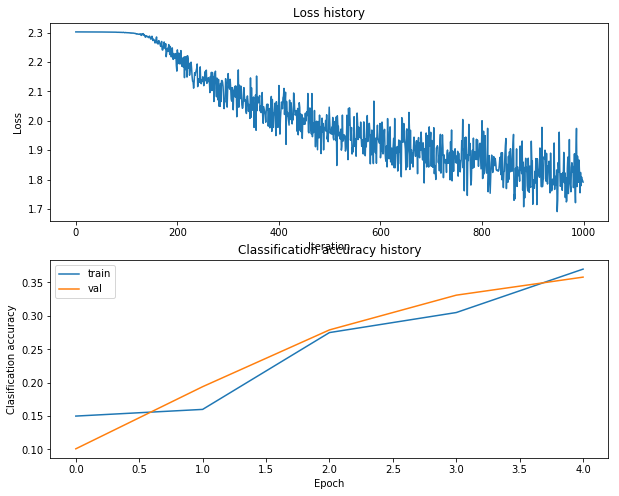

hyper parameter is  (0.0002, 0.12, 0.91)
iteration 0 / 1000: loss 2.302776
iteration 100 / 1000: loss 2.300011
iteration 200 / 1000: loss 2.215394
iteration 300 / 1000: loss 2.065605
iteration 400 / 1000: loss 1.979177
iteration 500 / 1000: loss 1.937062
iteration 600 / 1000: loss 1.853689
iteration 700 / 1000: loss 1.913771
iteration 800 / 1000: loss 1.937805
iteration 900 / 1000: loss 1.811594
Validation accuracy:  0.362


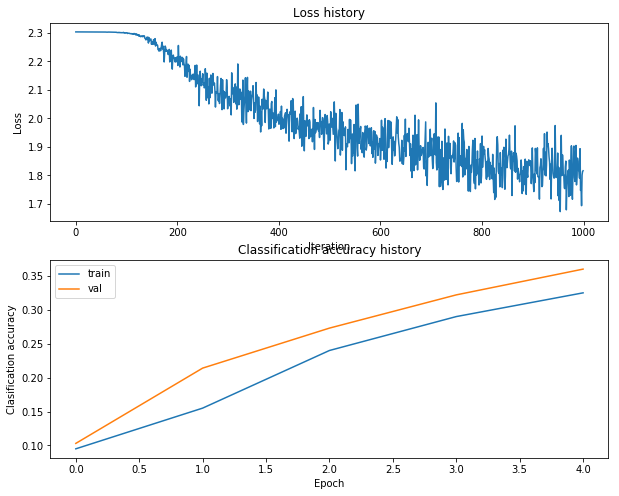

hyper parameter is  (0.0002, 0.12, 0.92)
iteration 0 / 1000: loss 2.302795
iteration 100 / 1000: loss 2.300390
iteration 200 / 1000: loss 2.192706
iteration 300 / 1000: loss 2.053151
iteration 400 / 1000: loss 2.064085
iteration 500 / 1000: loss 1.938220
iteration 600 / 1000: loss 1.957691
iteration 700 / 1000: loss 1.904387
iteration 800 / 1000: loss 1.846074
iteration 900 / 1000: loss 1.763601
Validation accuracy:  0.364


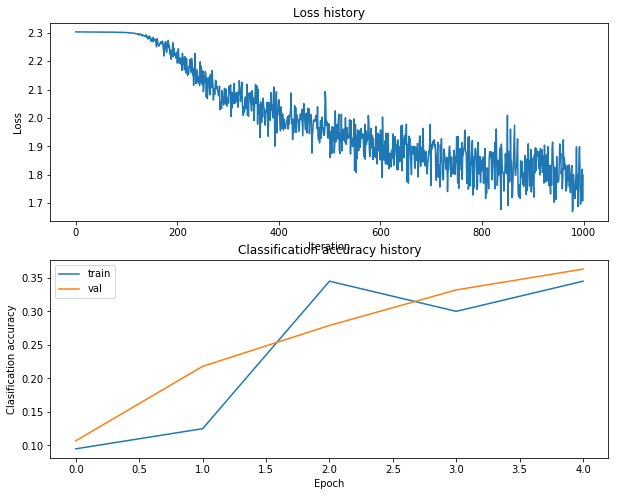

hyper parameter is  (0.0002, 0.12, 0.93)
iteration 0 / 1000: loss 2.302778
iteration 100 / 1000: loss 2.295777
iteration 200 / 1000: loss 2.214866
iteration 300 / 1000: loss 2.027418
iteration 400 / 1000: loss 1.974034
iteration 500 / 1000: loss 1.875953
iteration 600 / 1000: loss 2.015458
iteration 700 / 1000: loss 1.844596
iteration 800 / 1000: loss 1.839816
iteration 900 / 1000: loss 1.800388
Validation accuracy:  0.362


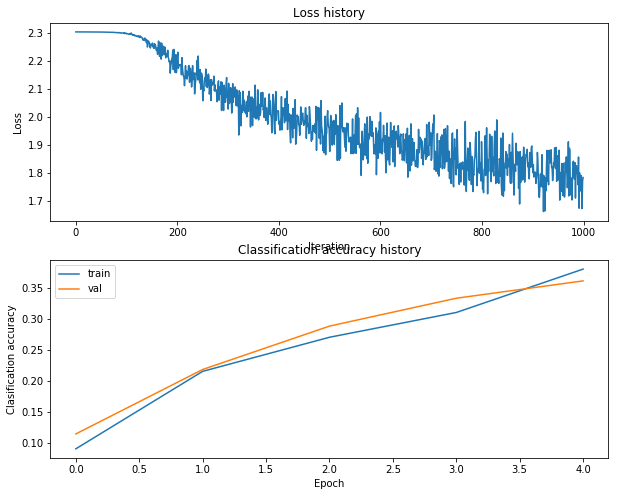

hyper parameter is  (0.00012, 0.1, 0.9)
iteration 0 / 1000: loss 2.302744
iteration 100 / 1000: loss 2.302194
iteration 200 / 1000: loss 2.294587
iteration 300 / 1000: loss 2.221518
iteration 400 / 1000: loss 2.162455
iteration 500 / 1000: loss 2.103352
iteration 600 / 1000: loss 2.029420
iteration 700 / 1000: loss 1.991823
iteration 800 / 1000: loss 1.957576
iteration 900 / 1000: loss 1.977770
Validation accuracy:  0.282


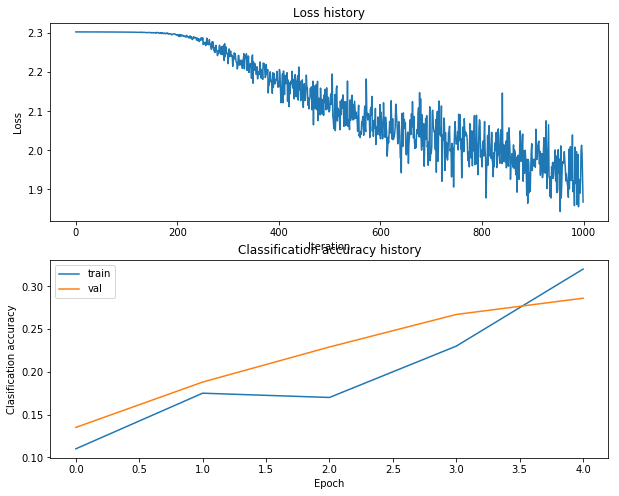

hyper parameter is  (0.00012, 0.1, 0.91)
iteration 0 / 1000: loss 2.302755
iteration 100 / 1000: loss 2.302192
iteration 200 / 1000: loss 2.296647
iteration 300 / 1000: loss 2.255466
iteration 400 / 1000: loss 2.106781
iteration 500 / 1000: loss 2.087510
iteration 600 / 1000: loss 2.045947
iteration 700 / 1000: loss 1.984474
iteration 800 / 1000: loss 1.961923
iteration 900 / 1000: loss 1.965454
Validation accuracy:  0.293


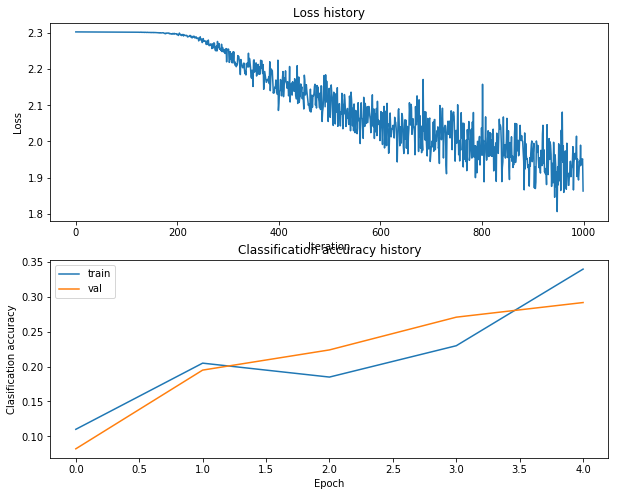

hyper parameter is  (0.00012, 0.1, 0.92)
iteration 0 / 1000: loss 2.302772
iteration 100 / 1000: loss 2.301991
iteration 200 / 1000: loss 2.291957
iteration 300 / 1000: loss 2.225014
iteration 400 / 1000: loss 2.185136
iteration 500 / 1000: loss 2.033531
iteration 600 / 1000: loss 2.017829
iteration 700 / 1000: loss 2.069796
iteration 800 / 1000: loss 1.973682
iteration 900 / 1000: loss 1.972312
Validation accuracy:  0.301


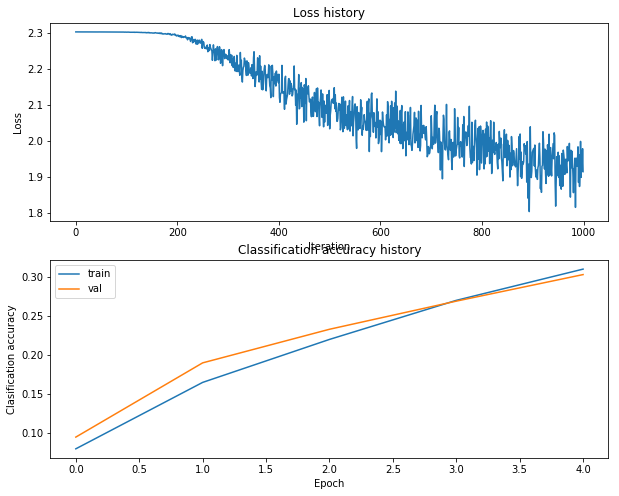

hyper parameter is  (0.00012, 0.1, 0.93)
iteration 0 / 1000: loss 2.302741
iteration 100 / 1000: loss 2.302080
iteration 200 / 1000: loss 2.290585
iteration 300 / 1000: loss 2.216227
iteration 400 / 1000: loss 2.132296
iteration 500 / 1000: loss 2.065559
iteration 600 / 1000: loss 2.080722
iteration 700 / 1000: loss 1.992101
iteration 800 / 1000: loss 1.870137
iteration 900 / 1000: loss 1.899159
Validation accuracy:  0.3


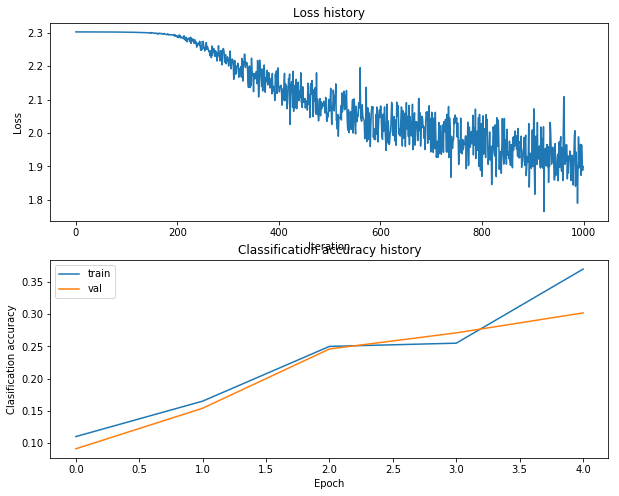

hyper parameter is  (0.00012, 0.11, 0.9)
iteration 0 / 1000: loss 2.302767
iteration 100 / 1000: loss 2.302290
iteration 200 / 1000: loss 2.296563
iteration 300 / 1000: loss 2.239933
iteration 400 / 1000: loss 2.153298
iteration 500 / 1000: loss 2.062743
iteration 600 / 1000: loss 2.127109
iteration 700 / 1000: loss 2.040340
iteration 800 / 1000: loss 2.002703
iteration 900 / 1000: loss 2.019607
Validation accuracy:  0.286


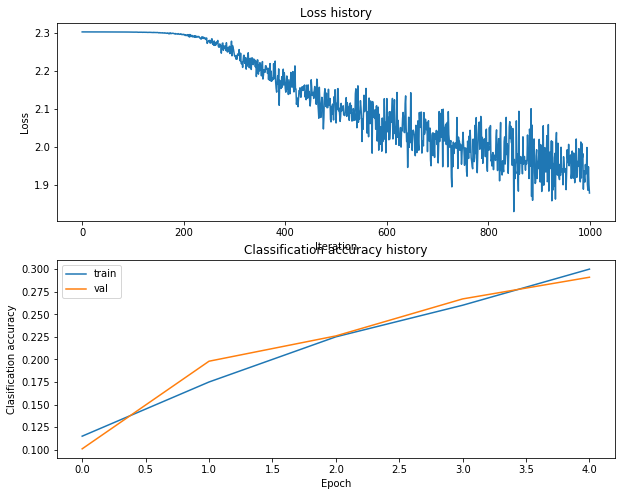

hyper parameter is  (0.00012, 0.11, 0.91)
iteration 0 / 1000: loss 2.302768
iteration 100 / 1000: loss 2.302129
iteration 200 / 1000: loss 2.291025
iteration 300 / 1000: loss 2.233076
iteration 400 / 1000: loss 2.157394
iteration 500 / 1000: loss 2.050463
iteration 600 / 1000: loss 2.089543
iteration 700 / 1000: loss 2.012507
iteration 800 / 1000: loss 1.917945
iteration 900 / 1000: loss 1.985121
Validation accuracy:  0.29


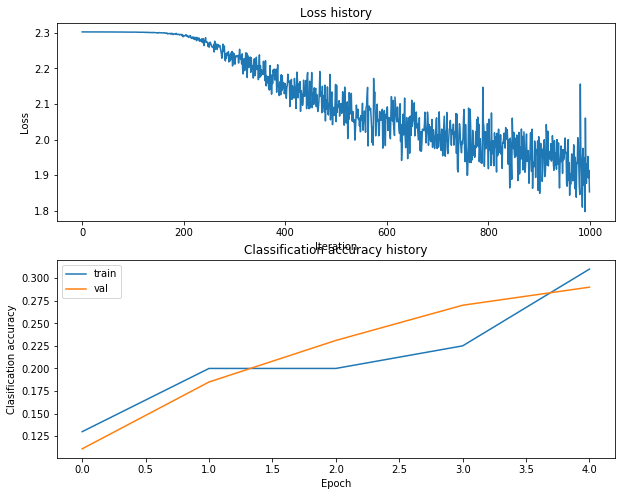

hyper parameter is  (0.00012, 0.11, 0.92)
iteration 0 / 1000: loss 2.302783
iteration 100 / 1000: loss 2.302207
iteration 200 / 1000: loss 2.292302
iteration 300 / 1000: loss 2.240410
iteration 400 / 1000: loss 2.166584
iteration 500 / 1000: loss 2.054393
iteration 600 / 1000: loss 2.042787
iteration 700 / 1000: loss 2.000394
iteration 800 / 1000: loss 1.953350
iteration 900 / 1000: loss 1.947969
Validation accuracy:  0.304


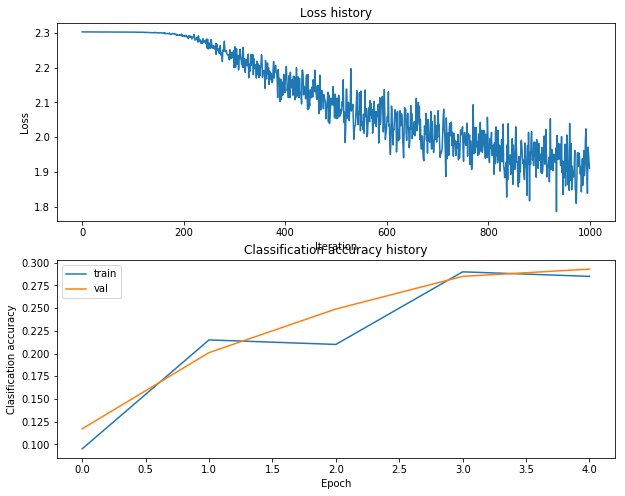

hyper parameter is  (0.00012, 0.11, 0.93)
iteration 0 / 1000: loss 2.302747
iteration 100 / 1000: loss 2.301990
iteration 200 / 1000: loss 2.292401
iteration 300 / 1000: loss 2.233597
iteration 400 / 1000: loss 2.138398
iteration 500 / 1000: loss 2.123755
iteration 600 / 1000: loss 2.037702
iteration 700 / 1000: loss 1.952464
iteration 800 / 1000: loss 2.033871
iteration 900 / 1000: loss 1.910761
Validation accuracy:  0.294


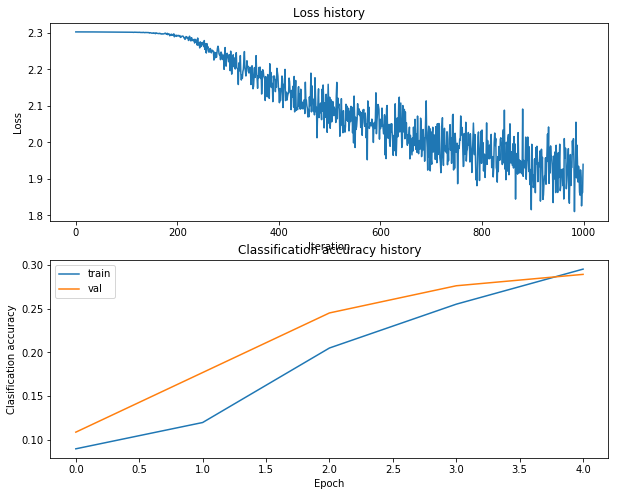

hyper parameter is  (0.00012, 0.12, 0.9)
iteration 0 / 1000: loss 2.302794
iteration 100 / 1000: loss 2.302282
iteration 200 / 1000: loss 2.291292
iteration 300 / 1000: loss 2.226698
iteration 400 / 1000: loss 2.184301
iteration 500 / 1000: loss 2.128783
iteration 600 / 1000: loss 2.007904
iteration 700 / 1000: loss 2.022001
iteration 800 / 1000: loss 1.863383
iteration 900 / 1000: loss 1.948466
Validation accuracy:  0.302


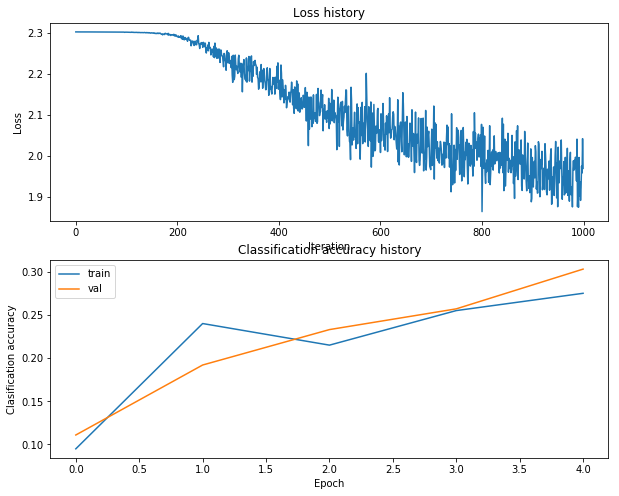

hyper parameter is  (0.00012, 0.12, 0.91)
iteration 0 / 1000: loss 2.302766
iteration 100 / 1000: loss 2.302230
iteration 200 / 1000: loss 2.290209
iteration 300 / 1000: loss 2.251915
iteration 400 / 1000: loss 2.147143
iteration 500 / 1000: loss 2.145705
iteration 600 / 1000: loss 2.028989
iteration 700 / 1000: loss 2.019739
iteration 800 / 1000: loss 2.039408
iteration 900 / 1000: loss 1.877811
Validation accuracy:  0.302


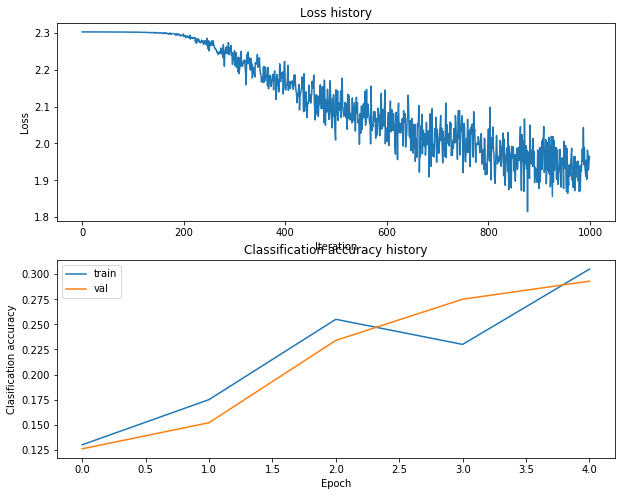

hyper parameter is  (0.00012, 0.12, 0.92)
iteration 0 / 1000: loss 2.302784
iteration 100 / 1000: loss 2.302207
iteration 200 / 1000: loss 2.294762
iteration 300 / 1000: loss 2.234978
iteration 400 / 1000: loss 2.155795
iteration 500 / 1000: loss 2.103516
iteration 600 / 1000: loss 2.003901
iteration 700 / 1000: loss 1.980095
iteration 800 / 1000: loss 1.937087
iteration 900 / 1000: loss 2.019938
Validation accuracy:  0.295


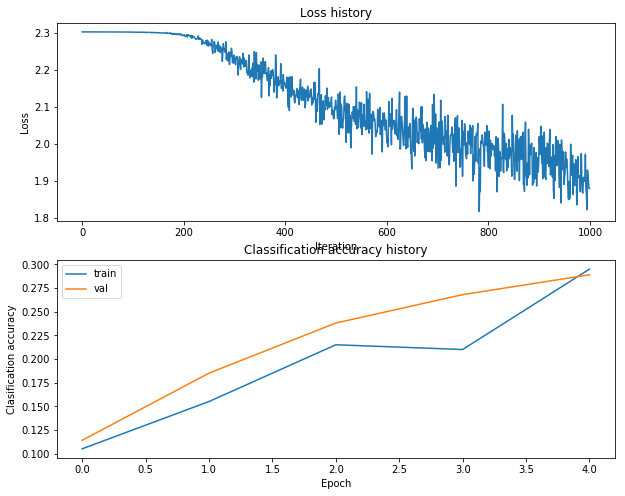

hyper parameter is  (0.00012, 0.12, 0.93)
iteration 0 / 1000: loss 2.302777
iteration 100 / 1000: loss 2.302128
iteration 200 / 1000: loss 2.288072
iteration 300 / 1000: loss 2.184077
iteration 400 / 1000: loss 2.146509
iteration 500 / 1000: loss 2.043259
iteration 600 / 1000: loss 2.018230
iteration 700 / 1000: loss 1.978232
iteration 800 / 1000: loss 1.954631
iteration 900 / 1000: loss 1.914947
Validation accuracy:  0.311


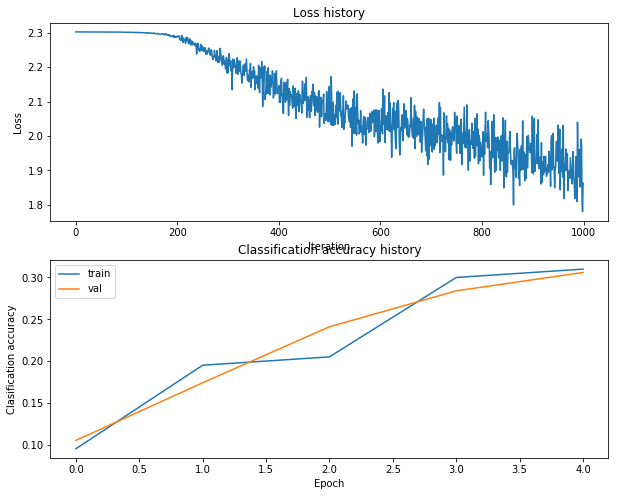

hyper parameter is  (0.00013, 0.1, 0.9)
iteration 0 / 1000: loss 2.302736
iteration 100 / 1000: loss 2.301637
iteration 200 / 1000: loss 2.288091
iteration 300 / 1000: loss 2.202863
iteration 400 / 1000: loss 2.070422
iteration 500 / 1000: loss 2.074497
iteration 600 / 1000: loss 2.063025
iteration 700 / 1000: loss 1.977108
iteration 800 / 1000: loss 1.913293
iteration 900 / 1000: loss 1.914343
Validation accuracy:  0.31


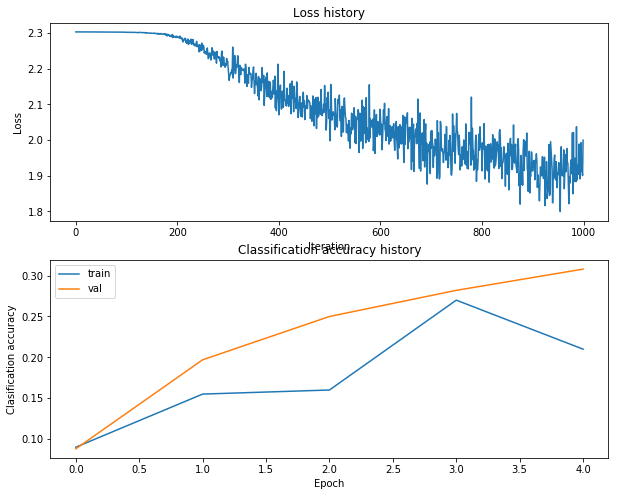

hyper parameter is  (0.00013, 0.1, 0.91)
iteration 0 / 1000: loss 2.302758
iteration 100 / 1000: loss 2.301875
iteration 200 / 1000: loss 2.286675
iteration 300 / 1000: loss 2.187615
iteration 400 / 1000: loss 2.083930
iteration 500 / 1000: loss 2.061906
iteration 600 / 1000: loss 1.980518
iteration 700 / 1000: loss 1.979572
iteration 800 / 1000: loss 1.865686
iteration 900 / 1000: loss 1.864025
Validation accuracy:  0.298


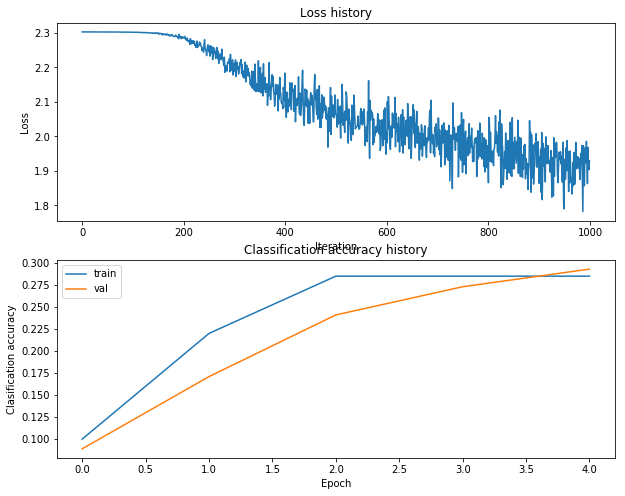

hyper parameter is  (0.00013, 0.1, 0.92)
iteration 0 / 1000: loss 2.302767
iteration 100 / 1000: loss 2.301856
iteration 200 / 1000: loss 2.280980
iteration 300 / 1000: loss 2.197088
iteration 400 / 1000: loss 2.138483
iteration 500 / 1000: loss 2.065795
iteration 600 / 1000: loss 2.026437
iteration 700 / 1000: loss 1.994983
iteration 800 / 1000: loss 1.966705
iteration 900 / 1000: loss 1.922397
Validation accuracy:  0.3


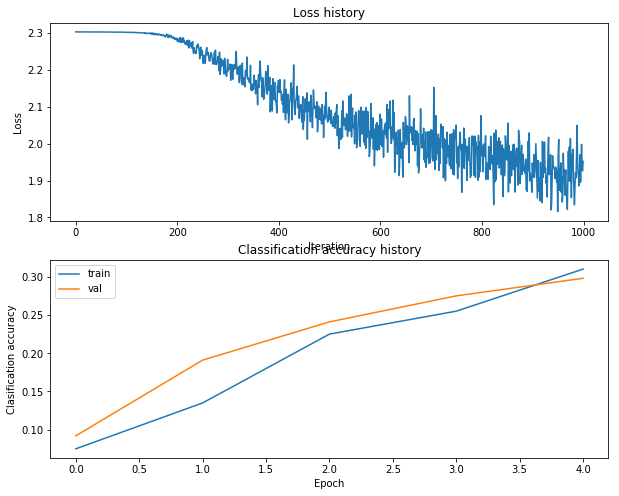

hyper parameter is  (0.00013, 0.1, 0.93)
iteration 0 / 1000: loss 2.302749
iteration 100 / 1000: loss 2.302113
iteration 200 / 1000: loss 2.289574
iteration 300 / 1000: loss 2.243549
iteration 400 / 1000: loss 2.107542
iteration 500 / 1000: loss 2.046196
iteration 600 / 1000: loss 2.044434
iteration 700 / 1000: loss 1.953566
iteration 800 / 1000: loss 1.933135
iteration 900 / 1000: loss 1.930393
Validation accuracy:  0.313


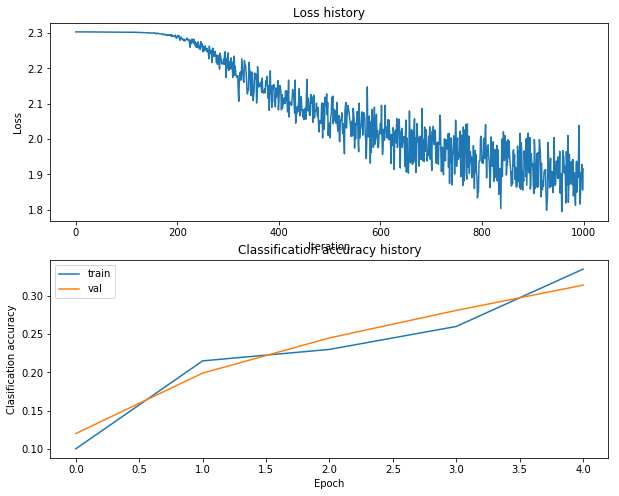

hyper parameter is  (0.00013, 0.11, 0.9)
iteration 0 / 1000: loss 2.302758
iteration 100 / 1000: loss 2.302062
iteration 200 / 1000: loss 2.293155
iteration 300 / 1000: loss 2.222665
iteration 400 / 1000: loss 2.143318
iteration 500 / 1000: loss 2.042222
iteration 600 / 1000: loss 1.992407
iteration 700 / 1000: loss 1.978422
iteration 800 / 1000: loss 1.972658
iteration 900 / 1000: loss 1.929034
Validation accuracy:  0.306


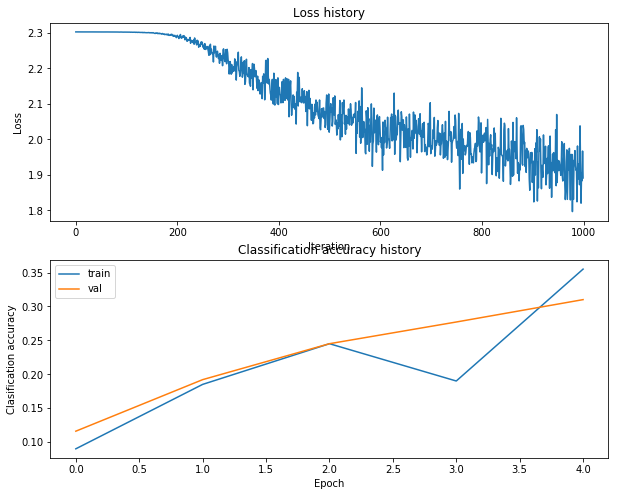

hyper parameter is  (0.00013, 0.11, 0.91)
iteration 0 / 1000: loss 2.302756
iteration 100 / 1000: loss 2.301836
iteration 200 / 1000: loss 2.288693
iteration 300 / 1000: loss 2.219498
iteration 400 / 1000: loss 2.124983
iteration 500 / 1000: loss 2.063472
iteration 600 / 1000: loss 2.095852
iteration 700 / 1000: loss 2.082564
iteration 800 / 1000: loss 1.899817
iteration 900 / 1000: loss 1.958387
Validation accuracy:  0.305


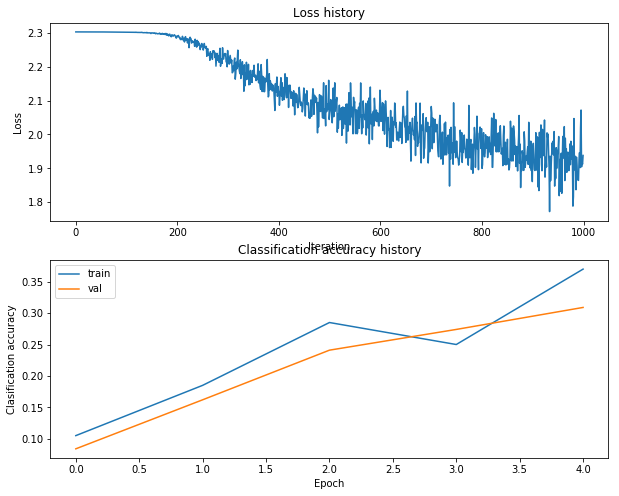

hyper parameter is  (0.00013, 0.11, 0.92)
iteration 0 / 1000: loss 2.302730
iteration 100 / 1000: loss 2.302256
iteration 200 / 1000: loss 2.290447
iteration 300 / 1000: loss 2.230160
iteration 400 / 1000: loss 2.163544
iteration 500 / 1000: loss 2.133940
iteration 600 / 1000: loss 2.025711
iteration 700 / 1000: loss 1.979335
iteration 800 / 1000: loss 1.931434
iteration 900 / 1000: loss 1.924538
Validation accuracy:  0.309


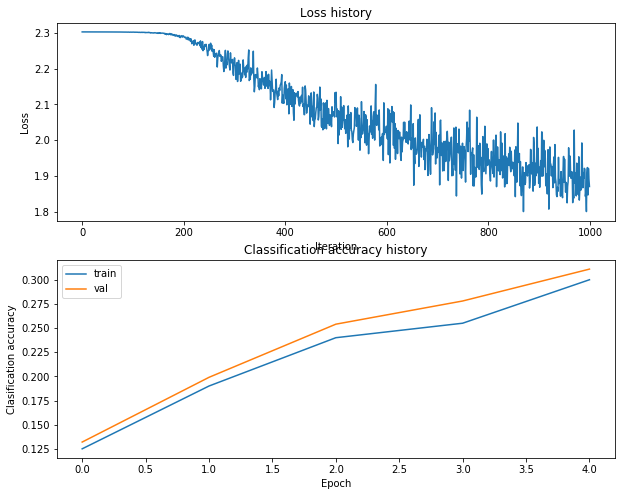

hyper parameter is  (0.00013, 0.11, 0.93)
iteration 0 / 1000: loss 2.302765
iteration 100 / 1000: loss 2.301535
iteration 200 / 1000: loss 2.278666
iteration 300 / 1000: loss 2.196425
iteration 400 / 1000: loss 2.068991
iteration 500 / 1000: loss 2.084083
iteration 600 / 1000: loss 1.999909
iteration 700 / 1000: loss 1.946843
iteration 800 / 1000: loss 1.884972
iteration 900 / 1000: loss 1.983934
Validation accuracy:  0.307


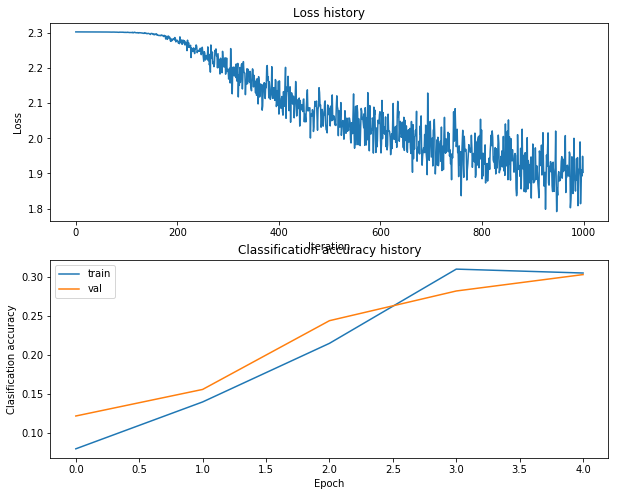

hyper parameter is  (0.00013, 0.12, 0.9)
iteration 0 / 1000: loss 2.302797
iteration 100 / 1000: loss 2.301813
iteration 200 / 1000: loss 2.287818
iteration 300 / 1000: loss 2.203001
iteration 400 / 1000: loss 2.155803
iteration 500 / 1000: loss 2.090250
iteration 600 / 1000: loss 2.026284
iteration 700 / 1000: loss 1.934323
iteration 800 / 1000: loss 1.967393
iteration 900 / 1000: loss 1.965307
Validation accuracy:  0.303


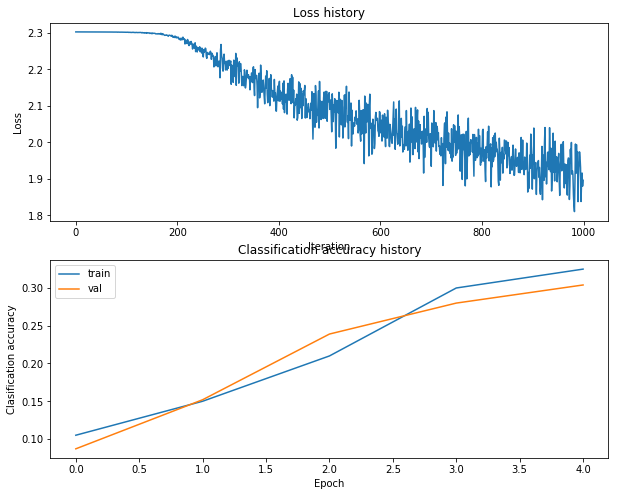

hyper parameter is  (0.00013, 0.12, 0.91)
iteration 0 / 1000: loss 2.302772
iteration 100 / 1000: loss 2.301494
iteration 200 / 1000: loss 2.280484
iteration 300 / 1000: loss 2.201983
iteration 400 / 1000: loss 2.084074
iteration 500 / 1000: loss 2.076850
iteration 600 / 1000: loss 2.039476
iteration 700 / 1000: loss 1.994828
iteration 800 / 1000: loss 1.941199
iteration 900 / 1000: loss 1.897415
Validation accuracy:  0.31


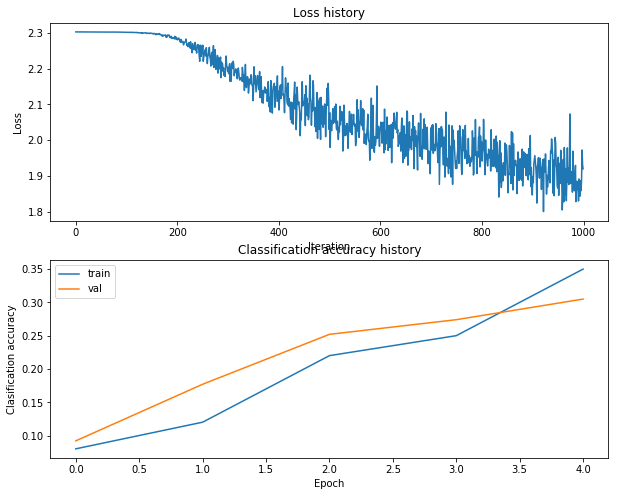

hyper parameter is  (0.00013, 0.12, 0.92)
iteration 0 / 1000: loss 2.302795
iteration 100 / 1000: loss 2.302152
iteration 200 / 1000: loss 2.283677
iteration 300 / 1000: loss 2.206596
iteration 400 / 1000: loss 2.078321
iteration 500 / 1000: loss 2.068542
iteration 600 / 1000: loss 1.992374
iteration 700 / 1000: loss 2.047954
iteration 800 / 1000: loss 1.995017
iteration 900 / 1000: loss 1.936515
Validation accuracy:  0.31


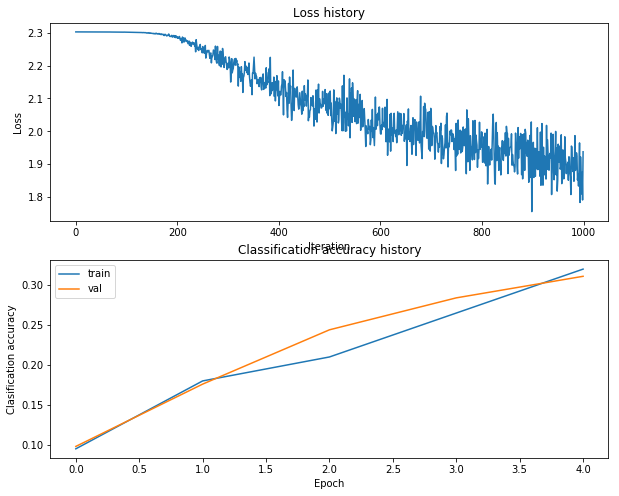

hyper parameter is  (0.00013, 0.12, 0.93)
iteration 0 / 1000: loss 2.302777
iteration 100 / 1000: loss 2.301343
iteration 200 / 1000: loss 2.285086
iteration 300 / 1000: loss 2.204094
iteration 400 / 1000: loss 2.095928
iteration 500 / 1000: loss 2.053150
iteration 600 / 1000: loss 2.001114
iteration 700 / 1000: loss 2.054350
iteration 800 / 1000: loss 1.953594
iteration 900 / 1000: loss 1.948150
Validation accuracy:  0.312


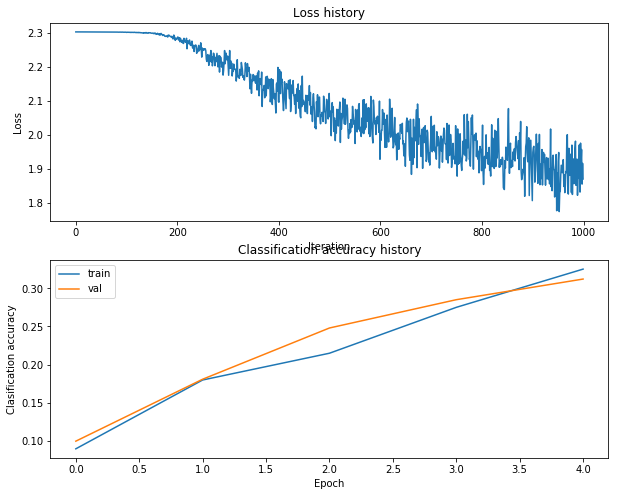

In [177]:
best_net = None # store the best model into this 
learning_rates = [2e-4, 1.2e-4, 1.3e-4,]
regs = [0.1, 0.11, 0.12]
learning_rate_decays = [0.9, 0.91, 0.92, 0.93]
pairs = []
for lr in learning_rates:
    for reg in regs:
        for decay in learning_rate_decays:
            pairs.append((lr,reg, decay))
            
            
accs = []
nets = []
for pair in pairs:
    # Train the network
    print('hyper parameter is ', pair)
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    nets.append(net)
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=1000, batch_size=200,
                learning_rate=pair[0], learning_rate_decay=pair[2],
                reg=pair[1], verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    accs.append(val_acc)
    print('Validation accuracy: ', val_acc)
    show_graph(stats)
    

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# Your code
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

(0.0002, 0.11, 0.92)
iteration 0 / 2000: loss 1.892421
iteration 100 / 2000: loss 1.866901
iteration 200 / 2000: loss 1.888423
iteration 300 / 2000: loss 1.840377
iteration 400 / 2000: loss 1.830997
iteration 500 / 2000: loss 1.672242
iteration 600 / 2000: loss 1.815216
iteration 700 / 2000: loss 1.731966
iteration 800 / 2000: loss 1.690080
iteration 900 / 2000: loss 1.640307
iteration 1000 / 2000: loss 1.666225
iteration 1100 / 2000: loss 1.612507
iteration 1200 / 2000: loss 1.705767
iteration 1300 / 2000: loss 1.653215
iteration 1400 / 2000: loss 1.582717
iteration 1500 / 2000: loss 1.538168
iteration 1600 / 2000: loss 1.618715
iteration 1700 / 2000: loss 1.706773
iteration 1800 / 2000: loss 1.442729
iteration 1900 / 2000: loss 1.539721


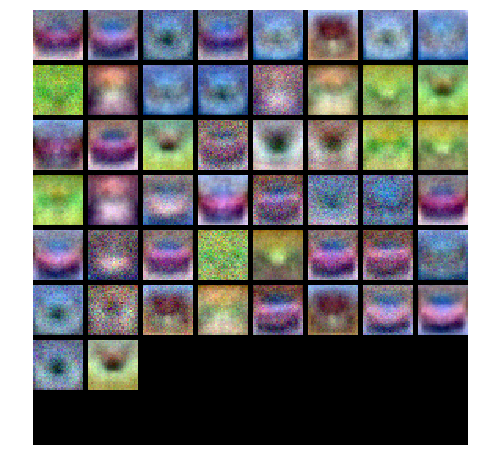

In [180]:
# visualize the weights of the best network
best_idx = np.argmax(accs)
print(pairs[best_idx])
bn = pairs[best_idx]

stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size=200,
                learning_rate=bn[0], learning_rate_decay=bn[2],
                reg=bn[1], verbose=True)

best_net = nets[np.argmax(accs)]
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [182]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.356


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*